In [2]:
import numpy as np
import pandas as pd

In [54]:
df=pd.read_csv("N1000_L100_E_dis8.0_S1.0000_T100000.000_B0.000MC.log",sep='\s+')    
        


In [55]:
df

,sweep,time,energy,accept,N_aggregate,bond_forming,bond_breaking
0,0,0.000,0,0.000,1000,0,0
1,1432,999.934,0,765.459,858,142,0
2,2864,1999.870,0,684.556,775,83,0
3,4296,2999.800,0,627.413,727,48,0
4,5728,3999.740,0,591.230,693,34,0
...,...,...,...,...,...,...,...
96,137472,95993.700,0,424.501,516,0,0
97,138904,96993.600,0,418.188,515,1,0
98,140336,97993.600,0,419.594,515,0,0
99,141768,98993.500,0,426.676,515,0,0


In [56]:
Nag=df["N_aggregate"].to_numpy()


In [57]:
time=df["time"].to_numpy()

In [58]:
def Ag_to_monomer(Nag):
    return 1000-2*(1000-Nag)
vfunc=np.vectorize(Ag_to_monomer)
Nmonomer=vfunc(Nag)
Nmonomer

array([1000,  716,  550,  454,  386,  340,  298,  270,  250,  232,  216,
        198,  190,  180,  150,  142,  128,  120,  114,  114,  112,  104,
        104,   98,   92,   90,   84,   84,   80,   78,   76,   74,   74,
         72,   72,   66,   66,   66,   62,   60,   60,   60,   60,   60,
         60,   58,   58,   58,   58,   58,   56,   54,   54,   54,   50,
         50,   50,   48,   48,   46,   46,   42,   42,   42,   42,   42,
         42,   40,   38,   38,   36,   36,   36,   36,   36,   36,   36,
         36,   36,   36,   36,   36,   36,   36,   32,   32,   32,   32,
         32,   32,   32,   32,   32,   32,   32,   32,   32,   30,   30,
         30,   30])

In [59]:
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=time,y=Nmonomer))

In [60]:
def transform(x):
    return 1/x-1/1000
vtransform=np.vectorize(transform)
transform_x=vtransform(Nmonomer)
transform_x

array([0.        , 0.00039665, 0.00081818, 0.00120264, 0.00159067,
       0.00194118, 0.0023557 , 0.0027037 , 0.003     , 0.00331034,
       0.00362963, 0.00405051, 0.00426316, 0.00455556, 0.00566667,
       0.00604225, 0.0068125 , 0.00733333, 0.00777193, 0.00777193,
       0.00792857, 0.00861538, 0.00861538, 0.00920408, 0.00986957,
       0.01011111, 0.01090476, 0.01090476, 0.0115    , 0.01182051,
       0.01215789, 0.01251351, 0.01251351, 0.01288889, 0.01288889,
       0.01415152, 0.01415152, 0.01415152, 0.01512903, 0.01566667,
       0.01566667, 0.01566667, 0.01566667, 0.01566667, 0.01566667,
       0.01624138, 0.01624138, 0.01624138, 0.01624138, 0.01624138,
       0.01685714, 0.01751852, 0.01751852, 0.01751852, 0.019     ,
       0.019     , 0.019     , 0.01983333, 0.01983333, 0.02073913,
       0.02073913, 0.02280952, 0.02280952, 0.02280952, 0.02280952,
       0.02280952, 0.02280952, 0.024     , 0.02531579, 0.02531579,
       0.02677778, 0.02677778, 0.02677778, 0.02677778, 0.02677

In [61]:
from statistics import linear_regression
slope,intercept=linear_regression(transform_x,time,proportional=True)

In [62]:
slope

2872242.395309718

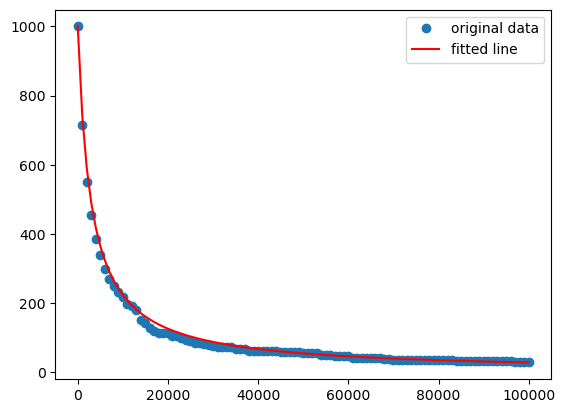

In [63]:
import matplotlib.pyplot as plt
plt.plot(time,Nmonomer,'o',label="original data")
plt.plot(time,1/(time/slope+1/1000),'r',label="fitted line")
plt.legend()
plt.show()

In [64]:
np.exp(-6)

0.0024787521766663585

In [109]:
for i in range(0,len(bond_traj)-1):
    conf1=bond_traj[i][:,0:4]
    conf2=bond_traj[i+1][:,0:4]
    for j in range(0,conf1.shape[0]):
        if np.where((conf2==tuple(conf1[j])).all(axis=1))[0].shape[0]==0:
            print("break%d"%(i))

break11
break11
break16
break16
break37
break37
break45
break45
break86
break86
break91
break91


In [97]:
conf1=bond_traj[1][:,0:4]
conf2=bond_traj[2][:,0:4]


In [98]:
tuple(conf1[1])

(12.0, 17.0, 3.0, 5.0)

In [100]:
np.where((conf2==tuple(conf1[1]).all(axis=1)))[0].shape[0]

AttributeError: 'tuple' object has no attribute 'all'

In [78]:
np.any([1,1,1],where=2)

True

In [91]:
np.where((bond_traj[1][:,0:4]==(9,37,4,4)).all(axis=1))[0].shape[0]==0

True

In [82]:
vals = np.array([[0, 0],
                 [1, 0],
                 [2, 0],
                 [0, 1],
                 [1, 1],
                 [2, 1],
                 [0, 2],
                 [1, 2],
                 [2, 2],
                 [0, 3],
                 [1, 3],
                 [2, 3],
                 [0, 0],
                 [1, 0],
                 [2, 0],
                 [0, 1],
                 [1, 1],
                 [2, 1],
                 [0, 2],
                 [1, 2],
                 [2, 2],
                 [0, 3],
                 [1, 3],
                 [2, 3]])

In [83]:
np.where((vals == (0, 1)).all(axis=1))

(array([ 3, 15]),)

In [115]:
bond_traj[-1].shape

(138, 5)